In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import heapq

stop_words = stopwords.words('english')

from glob import glob
from tqdm import tqdm

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to C:\Users\Tiago Mendes-
[nltk_data]     Neves\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Tiago Mendes-
[nltk_data]     Neves\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 1000

In [6]:
def stemmer(tokens):
    porter = PorterStemmer()
    stemmed = [porter.stem(token) for token in tokens]
    
    return stemmed

In [8]:
def get_train_data(data, sentiment):
    train_data_labeled = data[sentiment_df.label == sentiment]
    train_data_remaining = data[sentiment_df.label != sentiment].sample(len(train_data_labeled))
    train_data = pd.concat([train_data_labeled, train_data_remaining], ignore_index=True)

    return train_data

In [10]:
def filter_comment(comment):
    filtered_comment = comment.replace('\n','') # remove enters
    filtered_comment = filtered_comment.lower() # decapitalize
    filtered_comment = "".join([char for char in filtered_comment if char not in string.punctuation]) # remove punctuation
    filtered_comment = "".join([char for char in filtered_comment if char in "abcdefghijklmnopqrstuvwxyz "]) # remove strange chars
    
    return filtered_comment

In [12]:
def tokenize(filtered_comment):
    tokens = nltk.word_tokenize(filtered_comment) # Tokenize
    tokens = [token for token in tokens if token not in stop_words] # filter stop words

    return tokens

In [14]:
all_files = glob('sentiment data/data/*.txt')

In [16]:
# Filter all comments
filtered_data_dict = {}
for f in tqdm(all_files):
    comments = open(f, 'r', encoding='utf-8').readlines()

    filtered_data = []
    for comment in comments:
        if 'ago' in comment or 'award' in comment or 'carregar mais' in comment or 'permalinkembed' in comment or 'http' in comment:
            continue

        tokens = tokenize(comment)
        stemmed = tokenize(comment)

        if len(tokens) > 0:
            if f in filtered_data_dict.keys():
                filtered_data_dict[f].append(stemmed)
            else:
                filtered_data_dict[f] = [stemmed]

100%|██████████| 50/50 [00:06<00:00,  7.55it/s]


In [18]:
wordfreq = {}
for key in tqdm(filtered_data_dict.keys()):
    for sentence in filtered_data_dict[key]:
        for token in sentence:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1

100%|██████████| 50/50 [00:00<00:00, 551.90it/s]


In [20]:
len(wordfreq.keys())

13918

In [21]:
# Filter all comments
filtered_data_dict = {}
for f in tqdm(all_files):
    comments = open(f, 'r', encoding='utf-8').readlines()

    filtered_data = []
    for comment in comments:
        if 'ago' in comment or 'award' in comment or 'carregar mais' in comment or 'permalinkembed' in comment or 'http' in comment:
            continue

        filtered_comment = filter_comment(comment)
        tokens = tokenize(filtered_comment)
        stemmed = stemmer(tokens)

        if len(tokens) > 0:
            if f in filtered_data_dict.keys():
                filtered_data_dict[f].append(stemmed)
            else:
                filtered_data_dict[f] = [stemmed]

100%|██████████| 50/50 [00:05<00:00,  9.63it/s]


In [22]:
wordfreq = {}
for key in tqdm(filtered_data_dict.keys()):
    for sentence in filtered_data_dict[key]:
        for token in sentence:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1

100%|██████████| 50/50 [00:00<00:00, 1087.60it/s]


In [23]:
len(wordfreq.keys())

8117

In [24]:
most_freq = {}
for word in tqdm(wordfreq.keys()):
    if wordfreq[word] > 20:
        most_freq[word] = wordfreq[word]

100%|██████████| 8117/8117 [00:00<00:00, 1353361.65it/s]


In [25]:
len(most_freq.keys())

783

In [26]:
from wordcloud import WordCloud

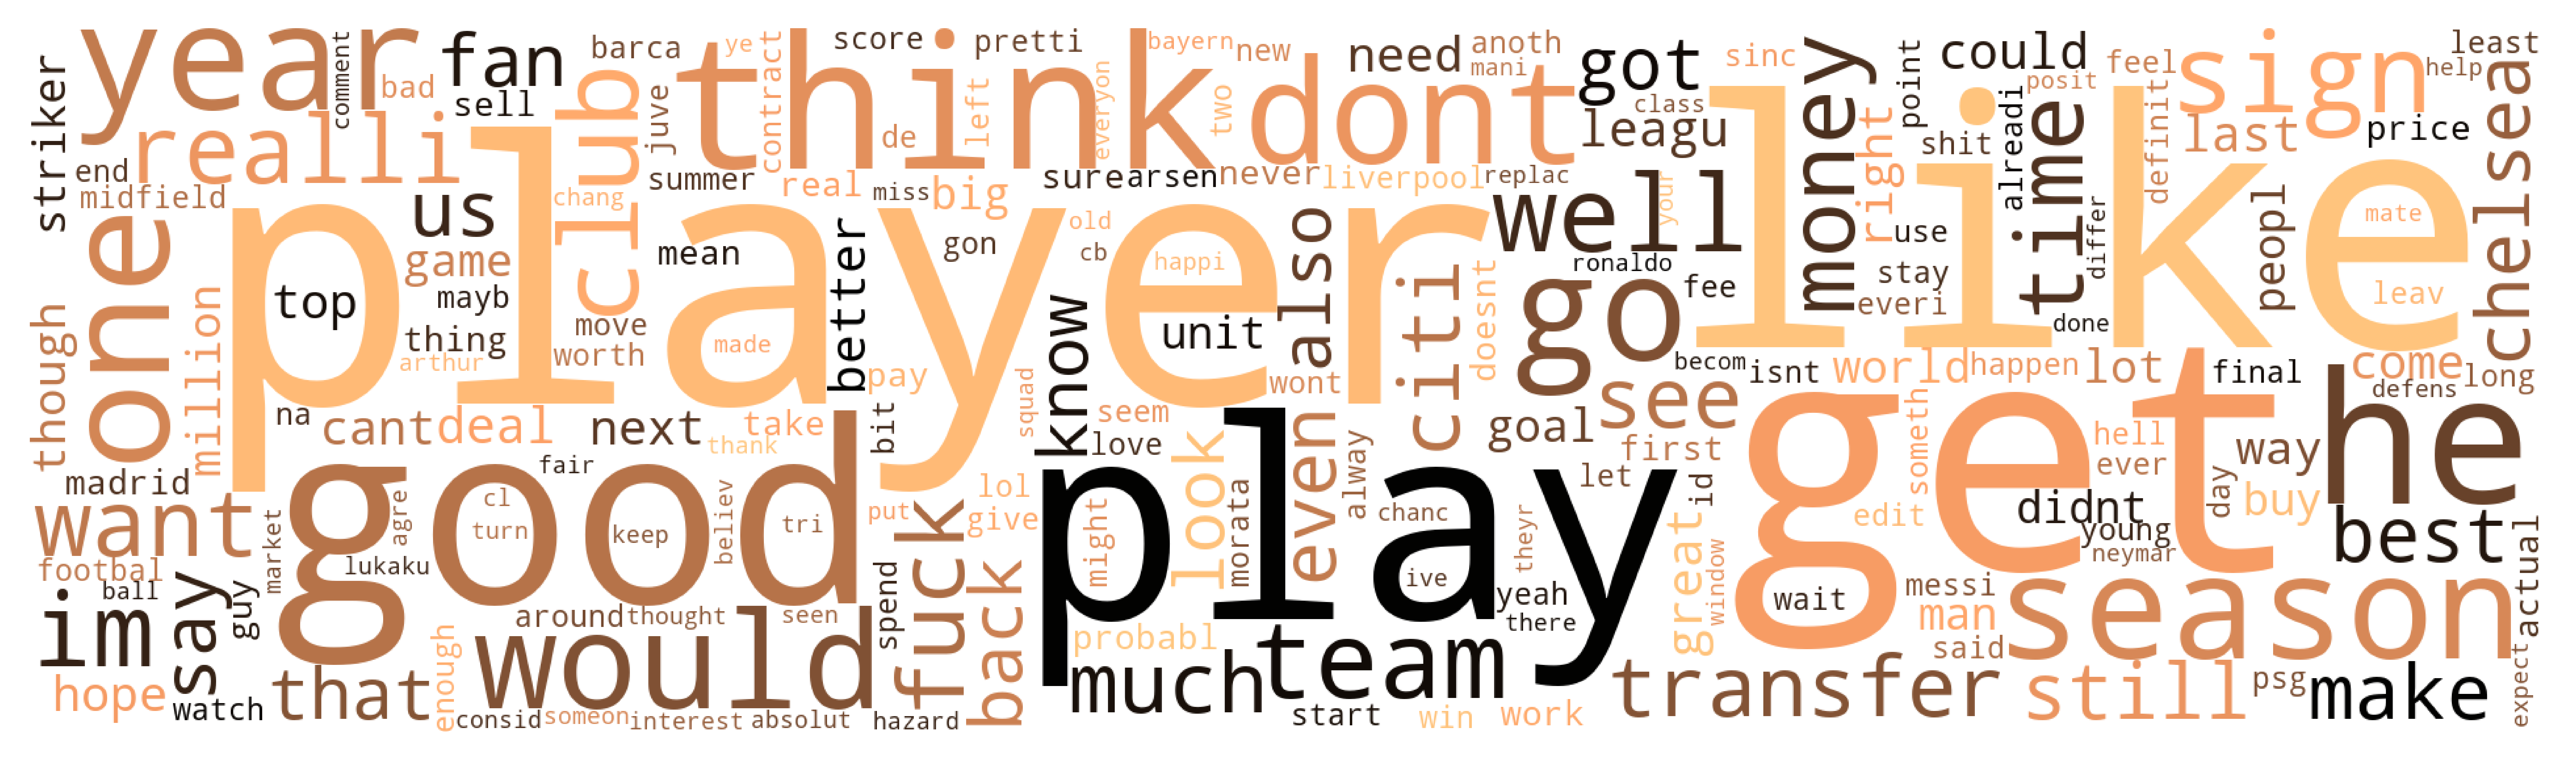

In [35]:
wordcloud = WordCloud(width=1920, height=540, background_color='white', colormap='copper').generate_from_frequencies(most_freq)
plt.figure(figsize = (12,4.5))
plt.imshow(wordcloud)
plt.axis('off');
plt.savefig('img/011b-1wordofcloudsbw.png', format='png')